<a href="https://colab.research.google.com/github/March-08/Pneumonia-Chest-X-Rays-Classifier/blob/main/Import__data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DOWNLOAD AND UZIP DATASET FROM KAGGLE

In [47]:
! py -m pip install opencv-python
! pip install -q kaggle

/bin/bash: py: command not found


In [48]:
from google.colab import files

files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [49]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [50]:
from IPython.utils import io
with io.capture_output() as captured:
  ! unzip chest-xray-pneumonia.zip

# SET CLASSES NAMES AND DATASET DIRECTORY

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR="./chest_xray/train"
DATADIR_TEST="./chest_xray/test"

CATEGORIES= ["NORMAL","BACTERIA","VIRUS"]
DIRECTORIES=["NORMAL","PNEUMONIA"]

NORMAL=0
BACTERIA=1
VIRUS=2

# show an image with label 

for category in CATEGORIES:
  path=os.path.join(DATADIR,category) #path to cath or dogs dir
 
  for img in os.listdir(path):
    if "virus" in img:
        print("virus")
    elif "bacteria" in img:
        print("bacteria")
    else:
        print("normal")
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    
    break
  break
    '''



'\n\nfor category in CATEGORIES:\n  path=os.path.join(DATADIR,category) #path to cath or dogs dir\n \n  for img in os.listdir(path):\n    if "virus" in img:\n        print("virus")\n    elif "bacteria" in img:\n        print("bacteria")\n    else:\n        print("normal")\n    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)\n    plt.imshow(img_array,cmap="gray")\n    plt.show()\n    \n    break\n  break\n    '

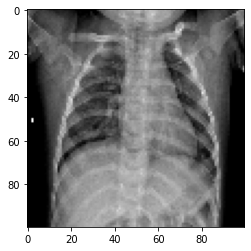

In [66]:
IMG_SIZE=100

new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [54]:
training_data=[]

def create_training_data():
    for directory in DIRECTORIES:
        path=os.path.join(DATADIR,directory) #path to cath or dogs dir
        for img in os.listdir(path):
            if "virus" in img:
                class_num=VIRUS
            elif "bacteria" in img:
                class_num=BACTERIA
            else:
                class_num=NORMAL
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
    
create_training_data()

In [55]:
test_data=[]

def create_test_data():
     for directory in DIRECTORIES:
        path=os.path.join(DATADIR_TEST,directory) #path to cath or dogs dir
        for img in os.listdir(path):
            if "virus" in img:
                class_num=VIRUS
            elif "bacteria" in img:
                class_num=BACTERIA
            else:
                class_num=NORMAL
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                test_data.append([new_array,class_num])
            except Exception as e:
                print("error")
            
    
create_test_data()


# Save test data for future error analysis

In [70]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

test_label_data=test_data

pickle_out=open("test_label_data.pickle","wb")
pickle.dump(test_label_data,pickle_out)
pickle_out.close()

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  


file = drive.CreateFile({'parents':[{u'id': "1qY1ANPuWIl1kaE5H2N8dYzc6taeNE1sG"}]})
file.SetContentFile("test_label_data.pickle")
file.Upload()


In [57]:
import random

random.shuffle(training_data)

In [58]:
X_train=[]
y_train=[]

X_test=[]
y_test=[]

In [59]:
train_quantity=[0,0,0]

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
    
    if label==NORMAL:
        train_quantity[0]+=1
    elif label==BACTERIA:
        train_quantity[1]+=1
    else:
        train_quantity[2]+=1
        
        

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    

X_train=np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)   #1 finale perche sono in baianco e nero, senno era 3
X_test=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)


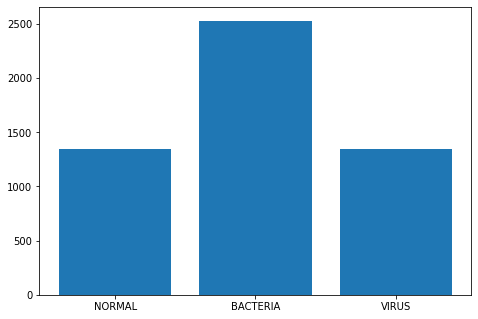

In [61]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs =CATEGORIES    
ax.bar(langs,train_quantity)
plt.show()


In [62]:
import pickle

pickle_names=["X_pneumonia_train.pickle","y_pneumonia_train.pickle","X_pneumonia_test.pickle","y_pneumonia_test.pickle"]

pickle_out=open(pickle_names[0],"wb")
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out=open(pickle_names[1],"wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()


pickle_out=open(pickle_names[2],"wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out=open(pickle_names[3],"wb")
pickle.dump(y_test,pickle_out)
pickle_out.close()




In [63]:
# get the folder id where you want to save your file
for name in pickle_names:
  file = drive.CreateFile({'parents':[{u'id': "1qY1ANPuWIl1kaE5H2N8dYzc6taeNE1sG"}]})
  file.SetContentFile(name)
  file.Upload()